# Importando bibliotecas

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from scipy.integrate import odeint
import matplotlib.pyplot as pl

# Definindo condicoes iniciais

In [32]:
numero_de_femeas_infectadas = 1
numero_de_femeas_saudaveis = 100.
numero_de_machos = 100.

condicoes_iniciais = [numero_de_femeas_infectadas, numero_de_femeas_saudaveis, numero_de_machos]

# Definindo modelo

In [33]:
def matriaquia(y, t, r1, r2, lambd, beta, alpha, k, dI, dN, dM):

    I = y[0]
    N = y[1]
    M = y[2]

    dIdt = r1 * ( (M*I) / (M+ ( (1/alpha) * (I+N) ) ) ) * (1 - (I+N+M) / k) - dI * I
    dNdt = r2 * ( (M*N) / (M+ ( (1/alpha) * (I+N) ) ) ) * r1 * ( (M*I) / (M+ ( (1/alpha) * (I+N) ) ) ) * beta * (1 - (I+N+M) / k) - dN * N
    dMdt = r1 * ( (M*I) / (M+ ( (1/alpha) * (I+N) ) ) ) * lambd * (1 - (I+N+M) / k) + r2 * ( (M*N) / (M+ (1/alpha) * (I+N) ) ) * (1 - (I+N+M) / k) - dM*M

    return [dIdt, dNdt, dMdt]

# Parametros

In [34]:
r1 = 2
r2 = 1

lambd = 0.1
beta = 0.035

alpha = 4
k = 300.

dI = .25
dN = .35
dM = dN

# Chamando o modelo

In [35]:
tempo = np.arange(0, 80, 1)
params = (r1, r2, lambd, beta, alpha, k, dI, dN, dM)
resultados = odeint(matriaquia, condicoes_iniciais, tempo, params)

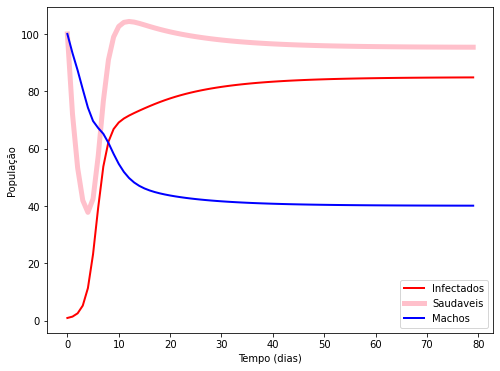

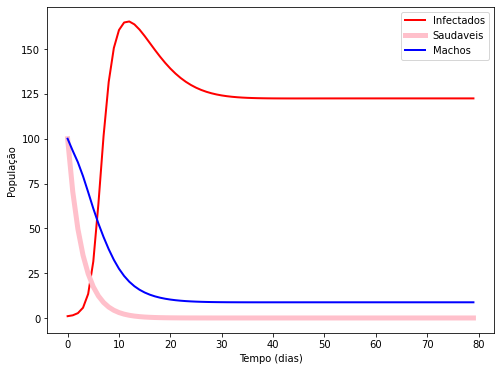

In [36]:
fig, ax = pl.subplots(figsize=(8,6))

# sum each item of each index from y[1] and y[2]
# soma = resultados.y[0] + resultados.y[1]

ax.plot(tempo, resultados[:, 0], color='red',zorder=1, linewidth=2, label='Infectados')
ax.plot(tempo, resultados[:, 1], color='pink',zorder=1, linewidth=5, label='Saudaveis')
ax.plot(tempo, resultados[:, 2], color='b',zorder=1, linewidth=2, label='Machos')

ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('População')

ax.legend()

beta = 0
params = (r1, r2, lambd, beta, alpha, k, dI, dN, dM)
resultados = odeint(matriaquia, condicoes_iniciais, tempo, params)

fig, ax2 = pl.subplots(figsize=(8,6))


ax2.plot(tempo, resultados[:, 0], color='red',zorder=1, linewidth=2, label='Infectados')
ax2.plot(tempo, resultados[:, 1], color='pink',zorder=1, linewidth=5, label='Saudaveis')
ax2.plot(tempo, resultados[:, 2], color='b',zorder=1, linewidth=2, label='Machos')

ax2.set_xlabel('Tempo (dias)')
ax2.set_ylabel('População')

ax2.legend()
